<a href="https://colab.research.google.com/github/rrizqiaa/MachineLearningTasks/blob/main/5thWeekTask/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Mengimpor pustaka yang diperlukan untuk EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)



---



## 2. Memuat data ke dalam kerangka data.

In [2]:
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail(5)                        # To display the botton 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



## 3. Memeriksa jenis data

Di sini, kami memeriksa jenis data karena terkadang MSRP atau harga mobil akan disimpan sebagai string, jika dalam kasus tersebut, kami harus mengonversi string tersebut menjadi data integer, baru kemudian kami dapat memplot data melalui grafik. Di sini, dalam kasus ini, data sudah dalam format integer, jadi tidak perlu khawatir.

In [5]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object




---



## 4. Menghapus kolom yang tidak relevan

Langkah ini tentu diperlukan dalam setiap EDA karena terkadang akan ada banyak kolom yang tidak pernah kami gunakan, dalam kasus seperti itu, menghapus adalah satu-satunya solusi. Dalam kasus ini, kolom seperti Jenis Bahan Bakar Mesin, Kategori Pasar, Gaya Kendaraan, Popularitas, Jumlah Pintu, Ukuran Kendaraan tidak masuk akal bagi saya, jadi saya hanya menghapusnya untuk contoh ini.

In [6]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 5. Mengganti nama kolom

Dalam contoh ini, sebagian besar nama kolom sangat membingungkan untuk dibaca, jadi saya hanya mengubah nama kolomnya. Ini adalah pendekatan yang baik, yang meningkatkan keterbacaan kumpulan data.

In [7]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500




---



## 6. Menghapus baris duplikat

Hal ini sering kali berguna untuk dilakukan karena kumpulan data yang besar seperti dalam kasus ini berisi lebih dari 10.000 baris sering kali memiliki beberapa data duplikat yang mungkin mengganggu, jadi di sini saya menghapus semua nilai duplikat dari kumpulan data tersebut. Misalnya sebelum menghapus, saya memiliki 11.914 baris data tetapi setelah menghapus duplikat, ada 10.925 data yang berarti saya memiliki 989 data duplikat.

In [8]:
df.shape

(11914, 10)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [10]:
df.count()      # Used to count the number of rows

,0
Make,11914
Model,11914
Year,11914
HP,11845
Cylinders,11884
Transmission,11914
Drive Mode,11914
MPG-H,11914
MPG-C,11914
Price,11914


data sebelumny 11914 rows sekarang menjadi 989 rows data.

In [11]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [12]:
df.count()

,0
Make,10925
Model,10925
Year,10925
HP,10856
Cylinders,10895
Transmission,10925
Drive Mode,10925
MPG-H,10925
MPG-C,10925
Price,10925




---



## 7. Menghapus nilai yang hilang atau nol.

Hal ini sebagian besar mirip dengan langkah sebelumnya tetapi di sini semua nilai yang hilang terdeteksi dan dihapus kemudian. Nah, ini bukan pendekatan yang baik untuk melakukannya, karena banyak orang hanya mengganti nilai yang hilang dengan rata-rata atau rerata kolom tersebut, tetapi dalam kasus ini, saya hanya menghapus nilai yang hilang tersebut. Hal ini karena ada hampir 100 nilai yang hilang dibandingkan dengan 10.000 nilai, ini adalah angka yang kecil dan ini dapat diabaikan jadi saya hanya menghapus nilai-nilai tersebut.

In [13]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


Inilah alasan mengapa pada langkah di atas saat menghitung Silinder dan Tenaga Kuda (HP) terdapat 10856 dan 10895 pada 10925 baris.

In [14]:
df = df.dropna()    # Dropping the missing values.
df.count()

,0
Make,10827
Model,10827
Year,10827
HP,10827
Cylinders,10827
Transmission,10827
Drive Mode,10827
MPG-H,10827
MPG-C,10827
Price,10827


Sekarang kita telah menghapus semua baris yang berisi nilai Null atau N/A (Silinder dan Tenaga Kuda (HP)).

In [15]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64




---



## 8. Mendeteksi Nilai Absolut

Nilai absolut adalah titik atau kumpulan titik yang berbeda dari titik lainnya. Terkadang nilai tersebut bisa sangat tinggi atau sangat rendah. Mendeteksi dan menghapus nilai absolut sering kali merupakan ide yang bagus. Karena nilai absolut merupakan salah satu alasan utama yang menghasilkan model yang kurang akurat. Oleh karena itu, menghapusnya merupakan ide yang bagus. Deteksi dan penghapusan nilai absolut yang akan saya lakukan disebut teknik skor IQR. Nilai absolut sering kali dapat dilihat dengan visualisasi menggunakan diagram kotak. Berikut ini ditunjukkan diagram kotak MSRP, Silinder, Tenaga Kuda, dan Ukuran Mesin. Di semua diagram ini, Anda dapat menemukan beberapa titik yang berada di luar kotak, yang tidak lain adalah nilai absolut. Teknik menemukan dan menghilangkan outlier yang saya lakukan dalam tugas ini diambil dari bantuan tutorial dari ilmu data.[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<Axes: xlabel='Price'>

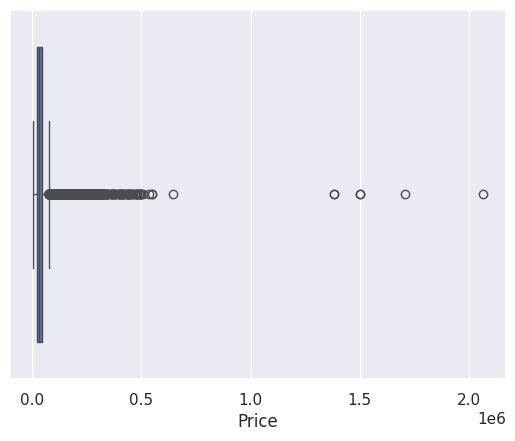

In [16]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

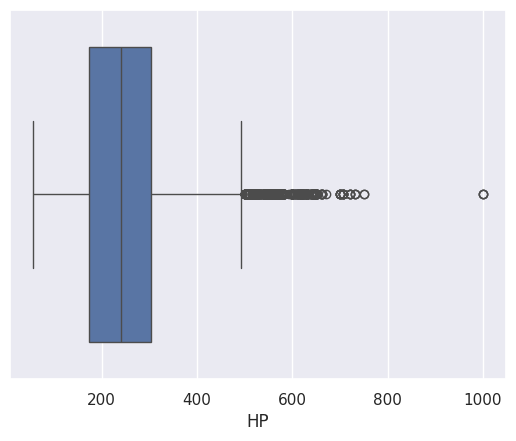

In [17]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

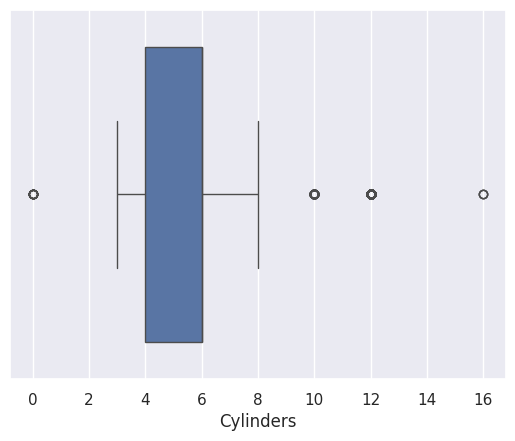

In [18]:
sns.boxplot(x=df['Cylinders'])

In [25]:
numerical_cols = df.select_dtypes(include=np.number).columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


Jangan khawatir tentang nilai-nilai di atas karena tidak penting untuk mengetahui masing-masing dan setiap nilai karena yang penting adalah mengetahui cara menggunakan teknik ini untuk menghilangkan outlier.

In [28]:
# Filter on numerical columns only to keep indices aligned
filtered_df = df[numerical_cols][~((df[numerical_cols] < (Q1 - 1.5 * IQR)) |(df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Update the original DataFrame using the filtered indices
df = df.loc[filtered_df.index]

df.shape

(9191, 10)

Seperti yang terlihat di atas, ada sekitar 1600 baris yang merupakan outlier. Namun, Anda tidak dapat sepenuhnya menghilangkan outlier karena bahkan setelah Anda menggunakan teknik di atas, mungkin ada 1–2 outlier yang tidak dihilangkan, tetapi tidak apa-apa karena ada lebih dari 100 outlier. Sesuatu lebih baik daripada tidak sama sekali.



---



## 9. Plotkan fitur yang berbeda satu sama lain (scatter), terhadap frekuensi (histogram)

### Histogram

Histogram mengacu pada frekuensi kemunculan variabel dalam suatu interval. Dalam kasus ini, terutama ada 10 jenis perusahaan manufaktur mobil yang berbeda, tetapi sering kali penting untuk mengetahui siapa yang memiliki jumlah mobil terbanyak. Untuk melakukan ini, histogram adalah salah satu solusi mudah yang memungkinkan kita mengetahui jumlah total mobil yang diproduksi oleh perusahaan yang berbeda.

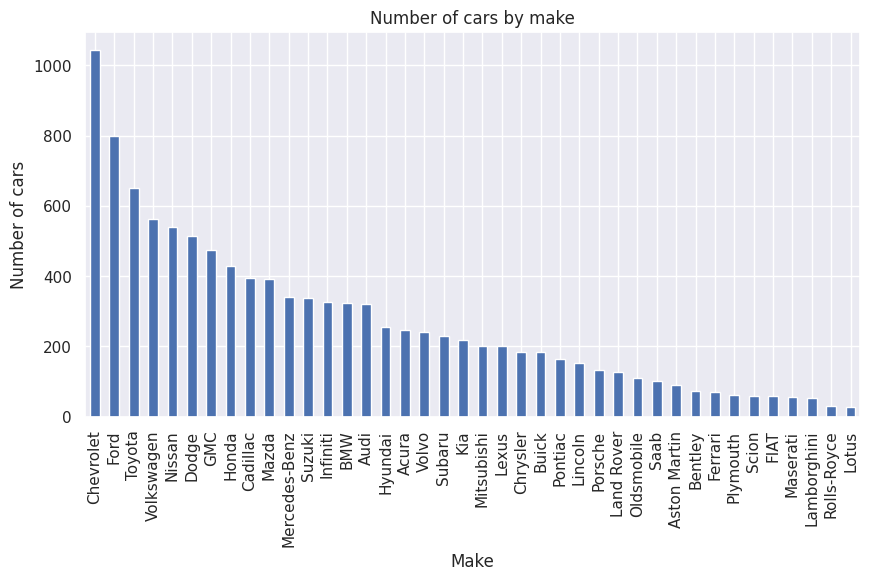

In [21]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps

Peta Panas adalah jenis plot yang diperlukan saat kita perlu menemukan variabel dependen. Salah satu cara terbaik untuk menemukan hubungan antara fitur dapat dilakukan dengan menggunakan peta panas. Dalam peta panas di bawah ini, kita mengetahui bahwa fitur harga

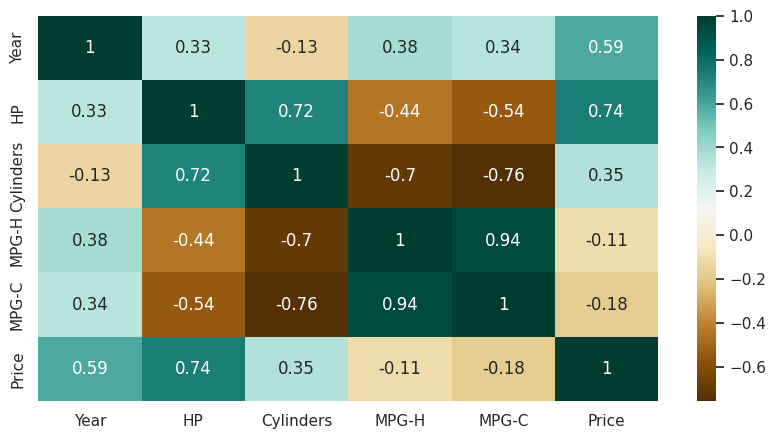

In [32]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
c = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Scatterplot

Kami biasanya menggunakan diagram sebar untuk menemukan korelasi antara dua variabel. Di sini, diagram sebar diplot antara Tenaga Kuda dan Harga dan kita dapat melihat diagram di bawah ini. Dengan diagram yang diberikan di bawah ini, kita dapat dengan mudah menggambar garis tren. Fitur-fitur ini memberikan penyebaran titik yang baik.

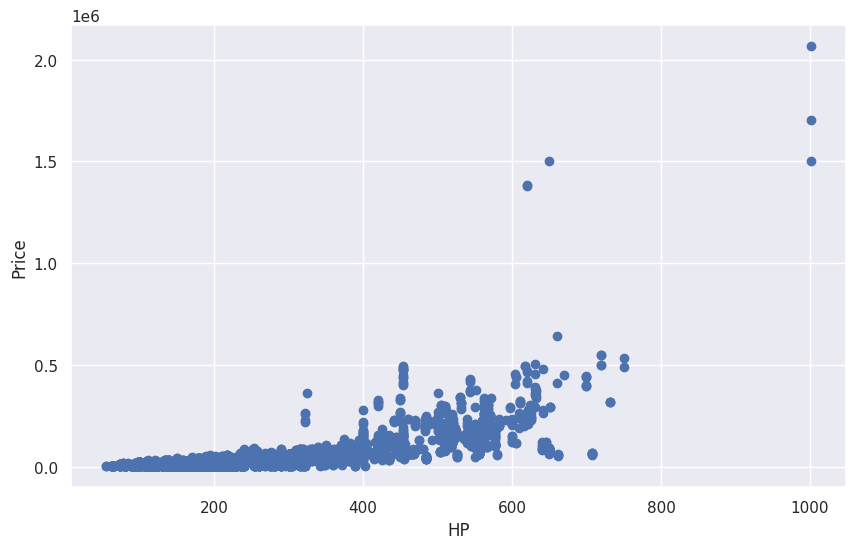

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Oleh karena itu, di atas adalah beberapa langkah yang terlibat dalam analisis data Eksploratori, berikut adalah beberapa langkah umum yang harus Anda ikuti untuk melakukan EDA. Masih banyak lagi yang akan datang, tetapi untuk saat ini, ini lebih dari cukup ide tentang cara melakukan EDA yang baik berdasarkan kumpulan data apa pun.